# Паутинообразная модель

## Задание.
1.	Построить имитационную модель взаимодействия потребителя и производителя посредством формирования цены на однопродуктовом рынке. Производитель формирует текущее предложение на основании известной цены продукта предыдущего периода и истории изменения переходящего запаса продукта. 
  
  Предпосылки:
  1.	Функция предложения - линейная. Приведите экономическое обоснование параметров функции.
  2.	Функция спроса – линейная. Приведите экономическое обоснование параметров функции.
  3.	В каждом периоде спрос полностью удовлетворяется за счет предложения.
  4.	Функции спроса и предложения в сериях испытаний не изменяются, в частности значения параметров.
2.	Провести необходимые эксперименты с моделью с целью выяснения закономерностей ее поведения в зависимости от значений параметров функций спроса и предложения. Привести экономическое обоснование наблюдаемых явлений.



## Реализация
Спрос описывается следующей функцией: 
$ D_t = a - bP_t + U_t $

Предложение описывается следующей функцией:
$ S_t = c + eP_{t-1} + V_t $

параметры $a, b, c, e$ определяются пользовательской функцией.

Равновесная цена в периоде $t$ определяется равенством спроса и предложения:

$ D_t + W_t = S_t + Q_{t-1} <=> a - bP_t + U_t + W_t= S_t + Q_{t-1}  $

$ P_t = {(a - c - eP_{t-1} + U_t - V_t - W_t)}/{b}$

$Q_t - $ объем запаса к концу периода времени $t$


In [ ]:
# Определяем функцию, которая будет рассчитывать состояния системы (цену, предложение, спрос) в зависимости от параметров функции спроса и предложения

def spider_model(a = 300, b = 5, c = 30, e = 5, price = 5, q_t_curr = 10, q_t_prev = 10, t = 100):
  
  import pandas as pd
  import numpy as np

  spider_model_list = []

  k = abs(np.random.normal(0, 0.5))
  for t in range(t):
    u = np.random.normal(0, 1)
    v = np.random.normal(0, 1)
    w = np.random.normal(0, 1)
    delta_q = (q_t_curr - q_t_prev)
    supply = c + e * (price - k * delta_q) + v
    price = (a - supply + u - v - q_t_prev) / b
    demand = a - b * price

    # if (supply < demand) and (q_t_curr <= 0):
    #   q_t_prev = q_t_curr
    #   q_t_curr = 0
    # elif (supply < demand) and (q_t_curr > 0):
    #   if (q_t_curr - (demand - supply)) > 0:
    #     q_t_prev = q_t_curr
    #     q_t_curr = q_t_curr - (demand - supply)
    #   else:
    #     q_t_prev = q_t_curr
    #     q_t_curr = 0
    # else:
    #   if (supply > demand) and (q_t_curr > 0):
    #     q_t_prev = q_t_curr
    #     q_t_curr = q_t_curr
    #   else:
    #     q_t_prev = q_t_curr
    #     q_t_curr = supply - demand
    # spider_model_list.append({'Year': t,'Price': price, 'Demand': demand, 'Supply': supply, 'Inventories': q_t_curr})

    q_t_prev = q_t_curr
    q_t_curr = q_t_curr - (demand - supply)
  
    spider_model_list.append({'Year': t,'Price': price, 'Demand': demand, 'Supply': supply, 'Inventories': q_t_curr})

  spider_model_table = pd.DataFrame(spider_model_list)
  return spider_model_table

In [ ]:
spider = spider_model()
spider

,Year,Price,Demand,Supply,Inventories
0,0,47.606796,61.966019,53.766637,1.800617
1,1,3.841763,280.791183,272.602575,-6.387991
2,2,49.028159,54.859207,54.483948,-6.763250
3,3,6.124234,269.378831,275.271934,-0.870146
4,4,50.386415,48.067925,56.237869,7.299798
...,...,...,...,...,...
95,95,3.287096,283.564522,284.560567,11.771777
96,96,49.278367,53.608166,44.207084,2.370695
97,97,0.561710,297.191450,284.080956,-10.739799
98,98,51.392644,43.036780,41.844413,-11.932167


In [ ]:
def visualize(spider):
  
  import pandas as pd
  import numpy as np
  import seaborn as sns
  import matplotlib.pyplot as plt

  plt.style.use('seaborn')
  fig, ax = plt.subplots(figsize = (16, 5))
  ax.set_title('Паутинообразная модель - цена'.upper(), size = 25, y = 1.05)
  sns.lineplot(data = spider, x = 'Year', y = 'Price', color = 'blueviolet', label = '')
  # ax.set_xticks(np.arange(0, 102, 5))
  # ax.set_yticks(np.arange(0, 5, 0.5))
  ax.set_xlabel('Год', size = 18)
  ax.set_ylabel('Цена', size = 18)
  plt.xticks(fontsize=13)
  plt.yticks(fontsize=13)
  plt.show()

In [ ]:
def visualize_inventories(spider):
  
  import pandas as pd
  import numpy as np
  import seaborn as sns
  import matplotlib.pyplot as plt

  plt.style.use('seaborn')
  fig, ax = plt.subplots(figsize = (16, 5))
  ax.set_title('Паутинообразная модель - запасы'.upper(), size = 25, y = 1.05)
  sns.lineplot(data = spider, x = 'Year', y = 'Inventories', color = 'blue', label = '')
  ax.set_xlabel('Год', size = 18)
  ax.set_ylabel('Запасы', size = 18)
  plt.xticks(fontsize=13)
  plt.yticks(fontsize=13)
  plt.show()

In [ ]:
def visualize_supply(spider):
  
  import pandas as pd
  import numpy as np
  import seaborn as sns
  import matplotlib.pyplot as plt

  plt.style.use('seaborn')
  fig, ax = plt.subplots(figsize = (16, 5))
  ax.set_title('Паутинообразная модель - предложение'.upper(), size = 25, y = 1.05)
  sns.lineplot(data = spider, x = 'Year', y = 'Supply', color = 'green', label = '')
  ax.set_xlabel('Год', size = 18)
  ax.set_ylabel('Величина предложения', size = 18)
  plt.xticks(fontsize=13)
  plt.yticks(fontsize=13)
  plt.show()

### Случай 1
Эластичность спроса по цене по модулю больше эластичности предложения по цене. 

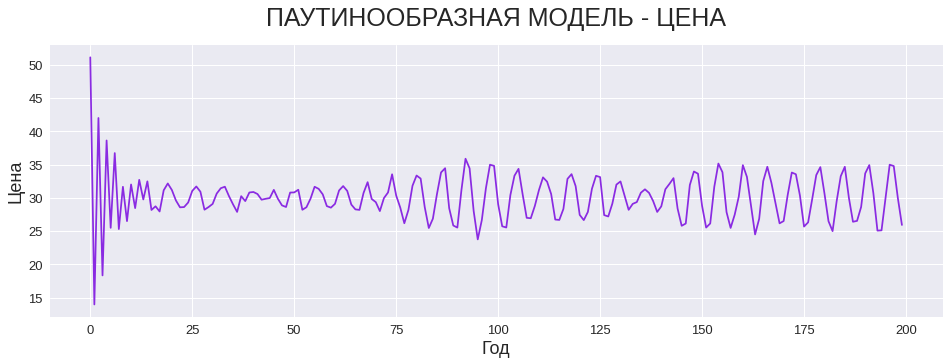

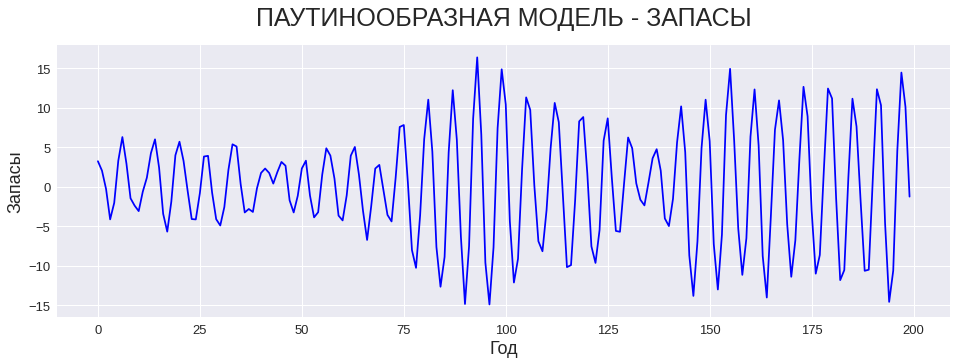

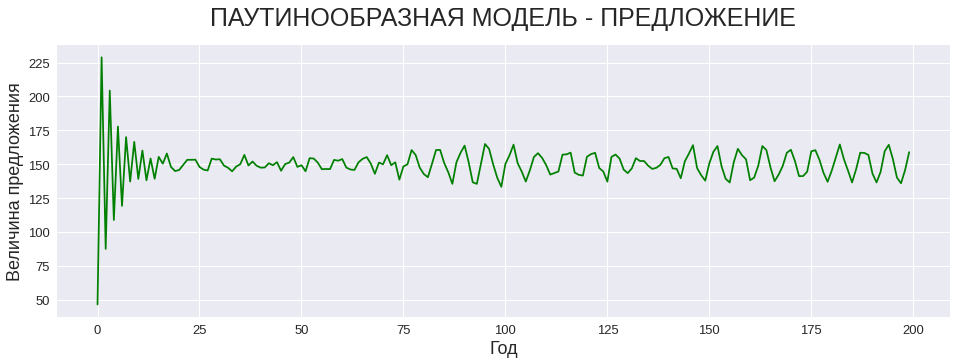

In [ ]:
spider = spider_model(a = 300, b = 5, c = 30, e = 4, price = 5, q_t_curr = 1, q_t_prev = 0, t = 200)
visualize(spider)
visualize_inventories(spider)
visualize_supply(spider)

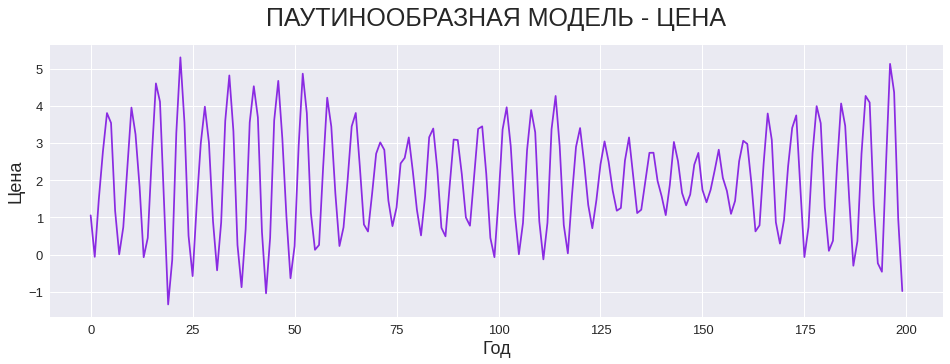

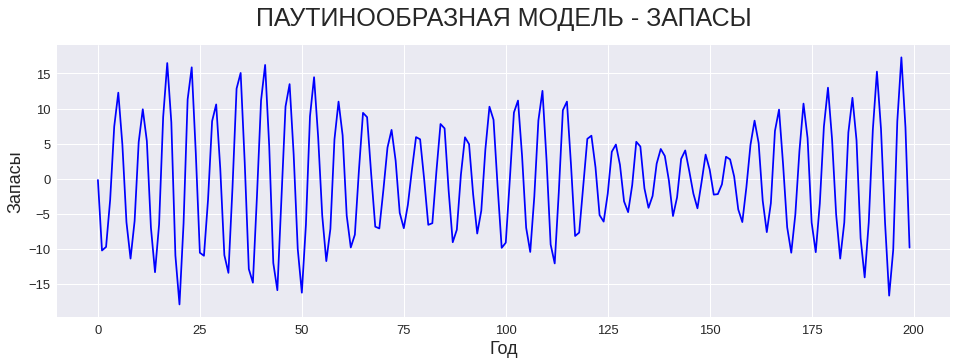

In [ ]:
spider = spider_model(a = 95, b = 8, c = 75, e = 2, price = 1, q_t_curr = 10, q_t_prev = 10, t = 200)
visualize(spider)
visualize_inventories(spider)

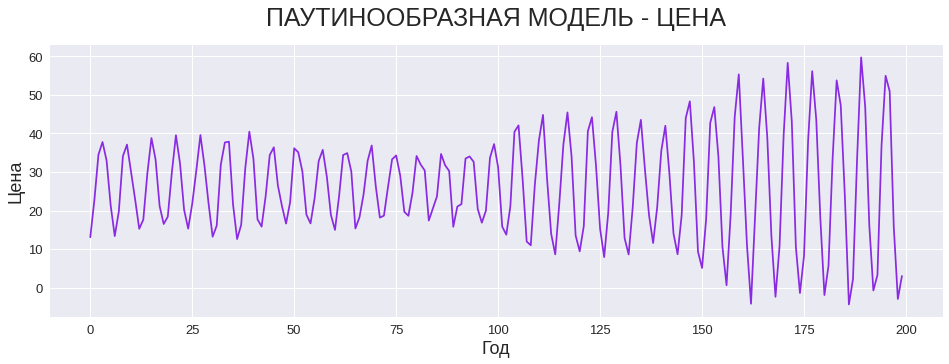

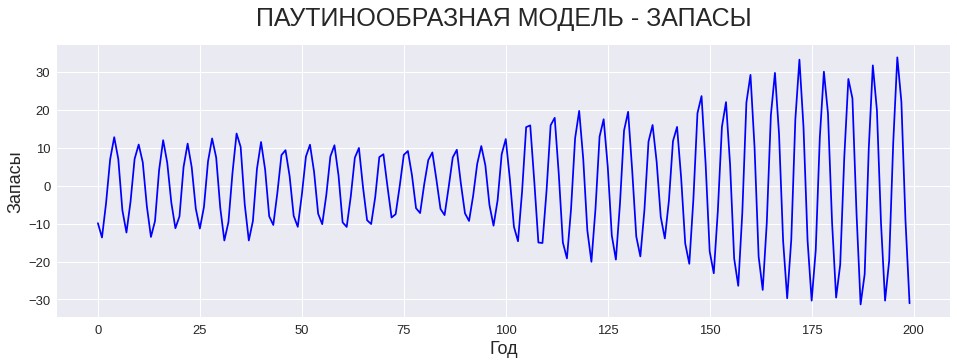

In [ ]:
spider = spider_model(a = 150, b = 1.1, c = 100, e = 0.8, price = 20, q_t_curr = 2, q_t_prev = 10, t = 200)
visualize(spider)
visualize_inventories(spider)

### Случай 2
Эластичность спроса по цене по модулю равна эластичности предложения по цене. 

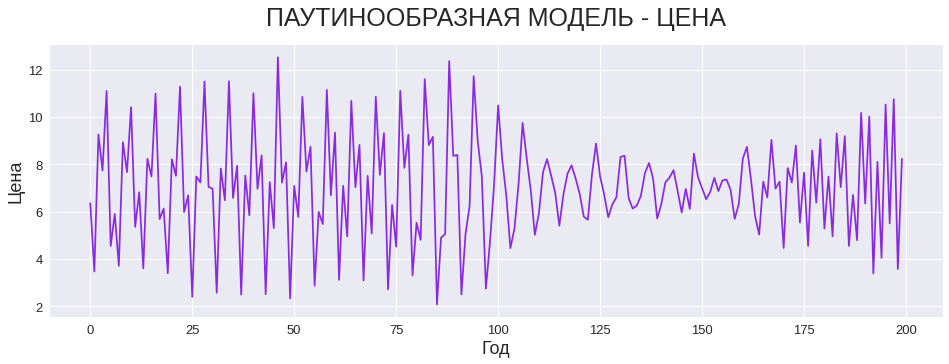

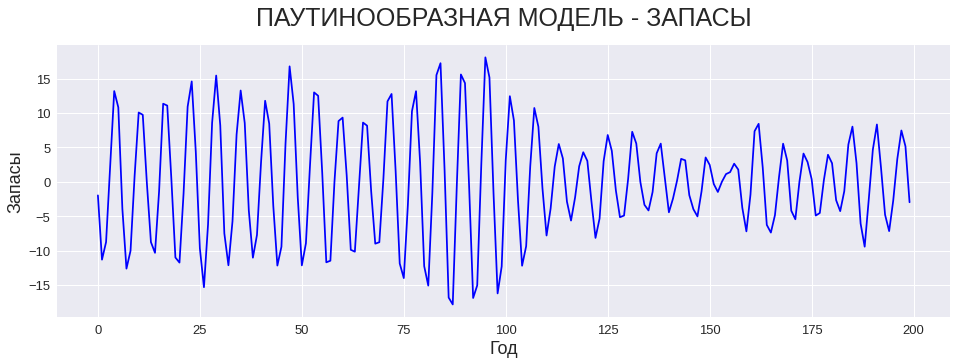

In [ ]:
spider = spider_model(a = 100, b = 5, c = 30, e = 5, price = 5, q_t_curr = 10, q_t_prev = 10, t = 200)
visualize(spider)
visualize_inventories(spider)

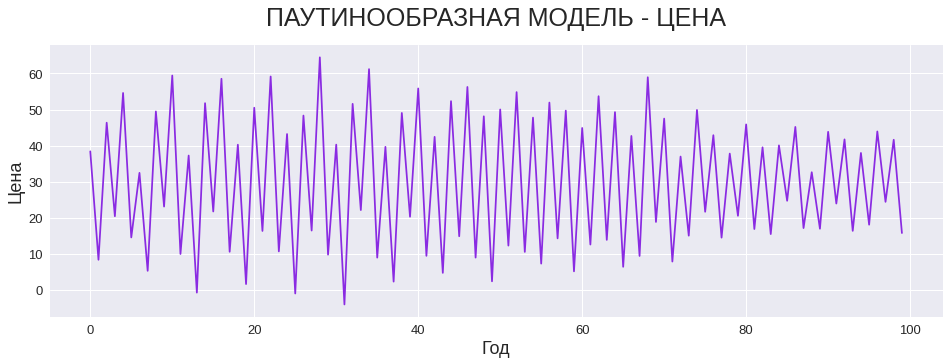

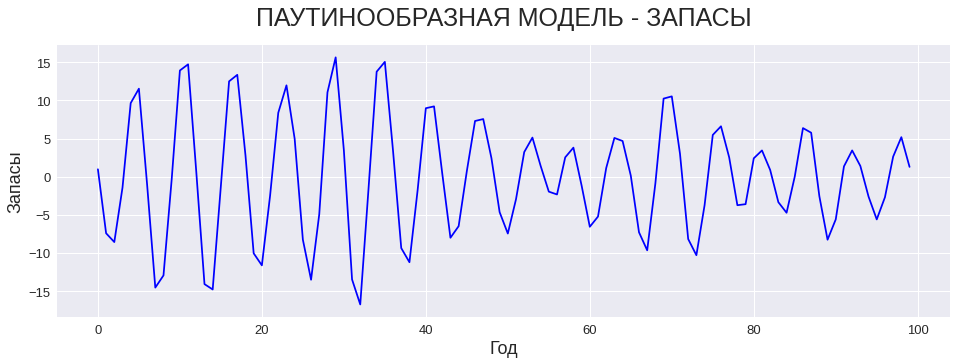

In [ ]:
spider = spider_model(a = 100, b = 1, c = 40, e = 1, price = 13, q_t_curr = 10, q_t_prev = 10, t = 100)
visualize(spider)
visualize_inventories(spider)

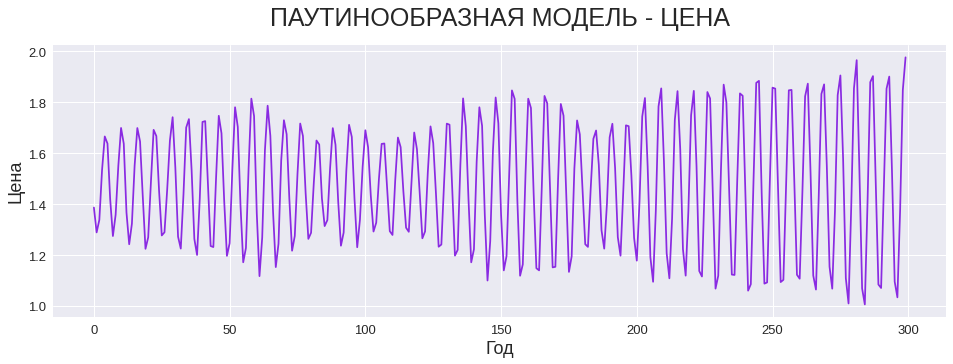

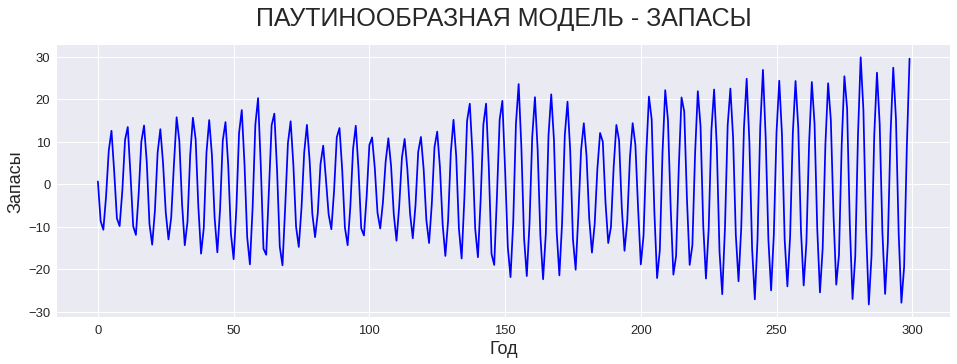

In [ ]:
spider = spider_model(a = 150, b = 100, c = 1, e = 1, price = 1, q_t_curr = 10, q_t_prev = 10, t = 300)
visualize(spider)
visualize_inventories(spider)

### Случай 3
Эластичность спроса по цене по модулю больше эластичности предложения по цене. 

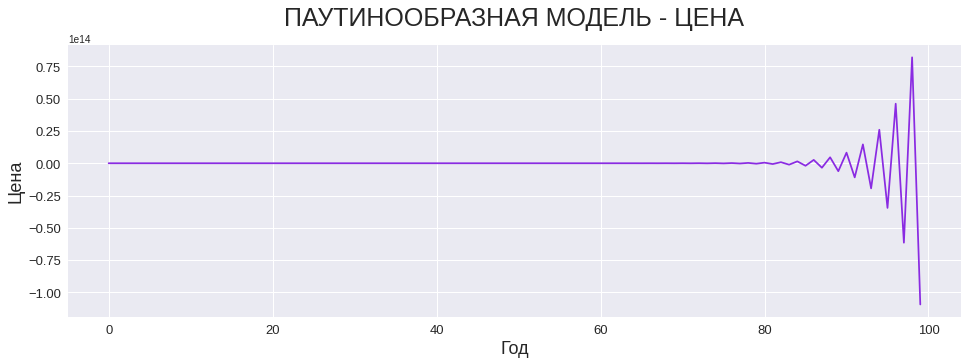

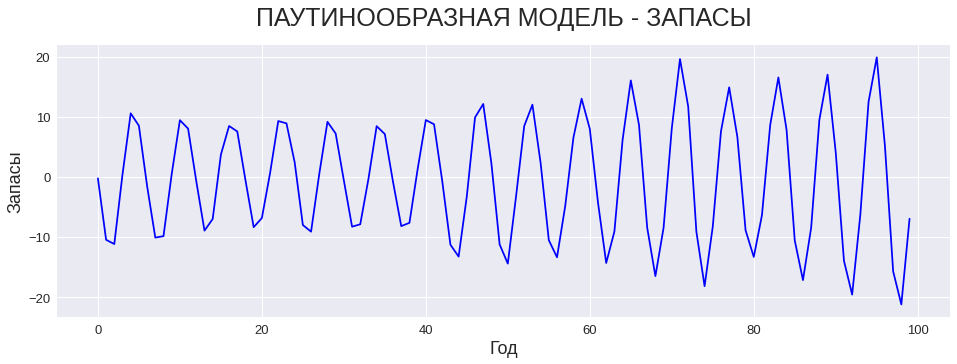

In [ ]:
spider = spider_model(a = 300, b = 3, c = 30, e = 4, price = 5, q_t_curr = 10, q_t_prev = 10, t = 100)
visualize(spider)
visualize_inventories(spider)

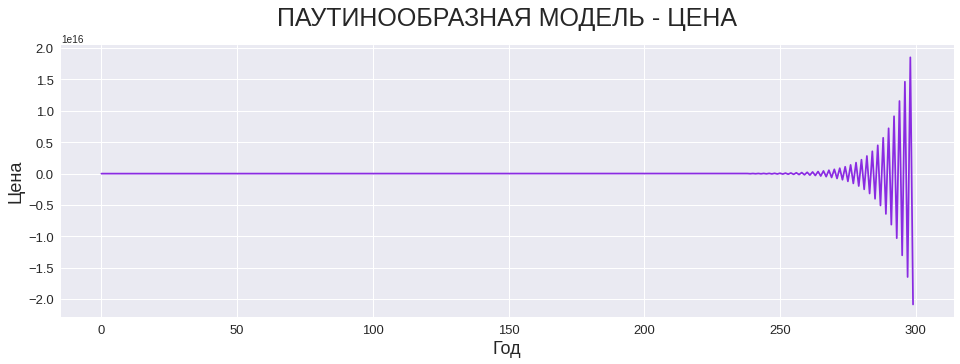

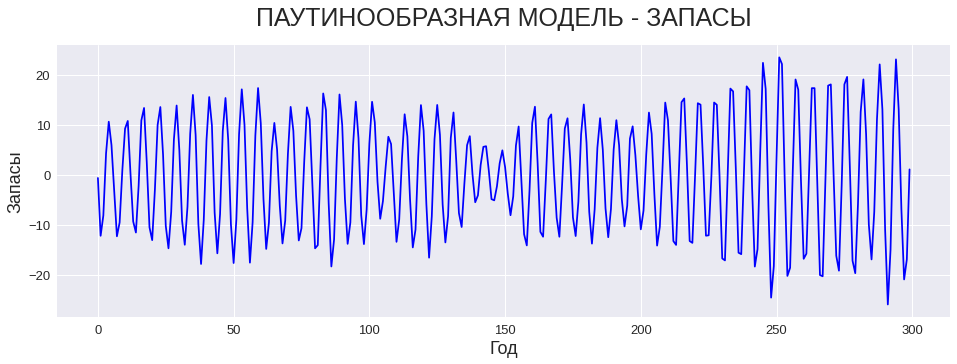

In [ ]:
spider = spider_model(a = 150, b = 0.8, c = 100, e = 0.9, price = 20, q_t_curr = 10, q_t_prev = 10, t = 300)
visualize(spider)
visualize_inventories(spider)